# ePSproc: auto-gen template development, Jupyter-runner version TIDY

30/03/20
- Separated thresholds into "thresCalc" and "thresPlot" for more control, and to avoid null calc issues.
- Updated lmPlot() now fixes issues with %age thresholding and labelling (ePSproc v1.2.5).

06/02/20
- Version for new calculations with E-chuncking. In this case, one run notebook per set of .out files and consolidate results.
- TODO: consolidate stacking code into epsproc

12/01/20
- Updated headers for (nb)Sphinx HTML compatibility (all down one level).

10/01/20
- Updating with Euler labels.
- Incorporated changes from 16/12/19 version (unfinished).

05/12/19
- Updated with lmPlot() routine.

05/11/19
- Set for single template per ePS datafile.
- Outputs BLM-L and BLM-V, named as per input file + datestamp.

## Set-up

### Load modules

In [1]:
import sys
import os
from pathlib import Path
import numpy as np
import epsproc as ep
import xarray as xr

from datetime import datetime as dt
timeString = dt.now()

* pyevtk not found, VTK export not available. 
* plotly not found, plotly plots not available. 


### Load data

In [2]:
# File path only, from env var DATAFILE
# dataPath = os.getcwd()
dataFile = os.environ.get('DATAFILE', '')
dataPath = Path(dataFile).parent.as_posix()  # Use first file for job info, and set dir for scanning

In [3]:
jobInfo = ep.headerFileParse(dataFile)
molInfo = ep.molInfoParse(dataFile)

*** Job info from file header.

 ePS XeF2_2020, batch XeF2_highRes_wf, orbital orb21_A1G
 XeF2 wavefn run, orb 21 ionization (Xe 4d, A1G/SG), sph grid. Inputs based on original 2019 calcs, now with chunking for higher E resolution.
 E=10.0:10.0:150.0 (15 points)


*** Found orbitals
1   1 Ene =   -1276.2548 Spin =Alpha Occup =   2.000000
2   2 Ene =    -202.4761 Spin =Alpha Occup =   2.000000
3   3 Ene =    -181.5792 Spin =Alpha Occup =   2.000000
4   4 Ene =    -181.5770 Spin =Alpha Occup =   2.000000
5   5 Ene =    -181.5770 Spin =Alpha Occup =   2.000000
6   6 Ene =     -43.1198 Spin =Alpha Occup =   2.000000
7   7 Ene =     -36.1973 Spin =Alpha Occup =   2.000000
8   8 Ene =     -36.1881 Spin =Alpha Occup =   2.000000
9   9 Ene =     -36.1881 Spin =Alpha Occup =   2.000000
10  10 Ene =     -26.3038 Spin =Alpha Occup =   2.000000
11  11 Ene =     -26.3038 Spin =Alpha Occup =   2.000000
12  12 Ene =     -25.8711 Spin =Alpha Occup =   2.000000
13  13 Ene =     -25.8673 Spin =Alpha Occ

In [4]:
# Scan file(s) for various data types...

# For dir scan
dataSetXS = ep.readMatEle(fileBase = dataPath, recordType = 'CrossSection')
dataSetMatE = ep.readMatEle(fileBase = dataPath, recordType = 'DumpIdy')

# For single file
# dataXS = ep.readMatEle(fileIn = dataFile, recordType = 'CrossSection')
# dataMatE = ep.readMatEle(fileIn = dataFile, recordType = 'DumpIdy')


*** ePSproc readMatEle(): scanning files for CrossSection segments.

*** Scanning dir
/home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb21_A1G
Found 20 .out file(s)


*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb21_A1G/XeF2_highRes_wf.orb21_A1G_E3.0_10.0_143.0eV.inp.out
Expecting 15 energy points.
Expecting 2 symmetries.
Scanning CrossSection segments.
Expecting 3 CrossSection segments.
Found 3 CrossSection segments (sets of results).
Processed 3 sets of CrossSection file segments, (0 blank)

*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb21_A1G/XeF2_highRes_wf.orb21_A1G_E2.0_10.0_142.0eV.inp.out
Expecting 15 energy points.
Expecting 2 symmetries.
Scanning CrossSection segments.
Expecting 3 CrossSection segments.
Found 3 CrossSection segments (sets of results).
Processed 3 sets of CrossSection file segments, (0 blank)

*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb21_A1G/XeF2_highRes_w

In [5]:
# Stack multi-E Xarrays into single array.
# Keep results as list for compatibility with rest of code (otherwise will slice Xarray)
dataXS = [xr.combine_nested(dataSetXS, concat_dim = ['Eke']).sortby('Eke')]
dataMatE = [xr.combine_nested(dataSetMatE, concat_dim = ['Eke']).sortby('Eke')]

## Job & molecule info


*** Job summary data
 ePS XeF2_2020, batch XeF2_highRes_wf, orbital orb21_A1G
 XeF2 wavefn run, orb 21 ionization (Xe 4d, A1G/SG), sph grid. Inputs based on original 2019 calcs, now with chunking for higher E resolution.
 E=10.0:10.0:150.0 (15 points)


Electronic structure input: '/home/paul/ePS_stuff/XeF2_2020/electronic_structure/xef2_SPKrATZP_rel_geom_v2.molden'
Initial state occ:		 [2 2 2 4 2 2 4 2 2 2 4 4 2 2 4 2 4 4 2 2 2 2 4 4 2 4]
Final state occ:		 [2 2 2 4 2 2 4 2 2 2 4 4 2 2 4 1 4 4 2 2 2 2 4 4 2 4]
IPot (input vertical IP, eV):		 12.35

*** Additional orbital info (SymProd)
Ionizing orb:			 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
Ionizing orb sym:		 ['SG']
Orb energy (eV):		 [-76.58100431]
Orb energy (H):			 [-2.8143]
Orb energy (cm^-1):		 [-617667.45504544]
Threshold wavelength (nm):	 16.189941558867268

*** Warning: some orbital convergences outside single-center expansion convergence tolerance (0.01):
[[10.          0.81998167]
 [11.          0.80599244]


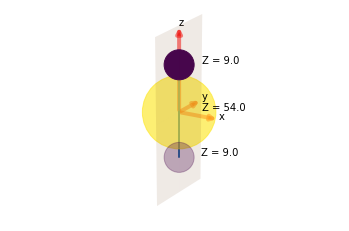

In [6]:
ep.jobSummary(jobInfo, molInfo);

## 1-photon ePS Cross-Sections
Plot 1-photon cross-sections and $beta_2$ parameters (for an unaligned ensemble) from ePS calculations. These are taken directly from the ePS output file, `CrossSection` segments. See the [ePS manual, `GetCro` command, for further details](https://www.chem.tamu.edu/rgroup/lucchese/ePolyScat.E3.manual/GetCro.html).

### Cross-sections by symmetry & type

Types correspond to:

- 'L': length gauge results.
- 'V': velocity gauge results.
- 'M': mixed gauge results.

Symmetries correspond to allowed ionizing transitions for the molecular point group (IRs typically corresponding to (x,y,z) polarization geometries), see the [ePS manual for a list of symmetries](https://www.chem.tamu.edu/rgroup/lucchese/ePolyScat.E3.manual/SymmetryLabels.html). Symmetry `All` corresponds to the sum over all allowed sets of symmetries.

Cross-section units are MBarn.

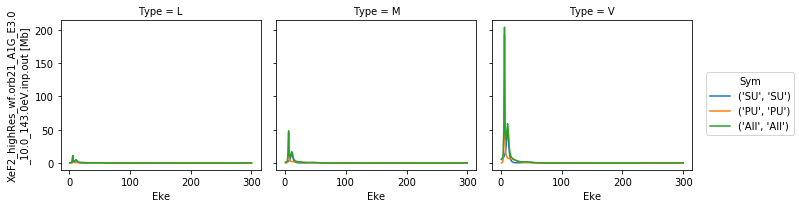

In [7]:
# Plot cross sections using Xarray functionality
# Set here to plot per file - should add some logic to combine files.
for data in dataXS:
    daPlot = data.sel(XC='SIGMA')
    daPlot.plot.line(x='Eke', col='Type')

### $\beta_{2}$ by symmetry & type

Types & symmetries as per cross-sections.  Normalized $\beta_{2}$ paramters, dimensionless.

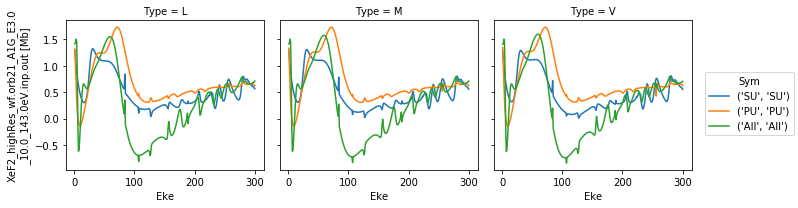

In [8]:
# Repeat for betas
for data in dataXS:
    daPlot = data.sel(XC='BETA')
    daPlot.plot.line(x='Eke', col='Type')

## Dipole matrix elements
For 1-photon ionization. These are taken directly from ePS `DumpIdy` segments. See the [ePS manual, `DumpIdy` command, for further details](https://www.chem.tamu.edu/rgroup/lucchese/ePolyScat.E3.manual/DumpIdy.html).

In [9]:
# Set threshold for significance, only matrix elements with abs values > thres % will be plotted
thresPlot = 0.1

/home/paul/anaconda3/envs/ePSproc-v1.2/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


Plotting data XeF2_highRes_wf.orb21_A1G_E3.0_10.0_143.0eV.inp.out, pType=a, thres=4.249411791226519, with Seaborn


/home/paul/anaconda3/envs/ePSproc-v1.2/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/home/paul/anaconda3/envs/ePSproc-v1.2/lib/python3.7/site-packages/numpy/lib/function_base.py:1520: RuntimeWarning: invalid value encountered in greater
  _nx.copyto(ddmod, pi, where=(ddmod == -pi) & (dd > 0))
/home/paul/anaconda3/envs/ePSproc-v1.2/lib/python3.7/site-packages/numpy/lib/function_base.py:1522: RuntimeWarning: invalid value encountered in less
  _nx.copyto(ph_correct, 0, where=abs(dd) < discont)


Plotting data XeF2_highRes_wf.orb21_A1G_E3.0_10.0_143.0eV.inp.out, pType=phaseUW, thres=4.249411791226519, with Seaborn


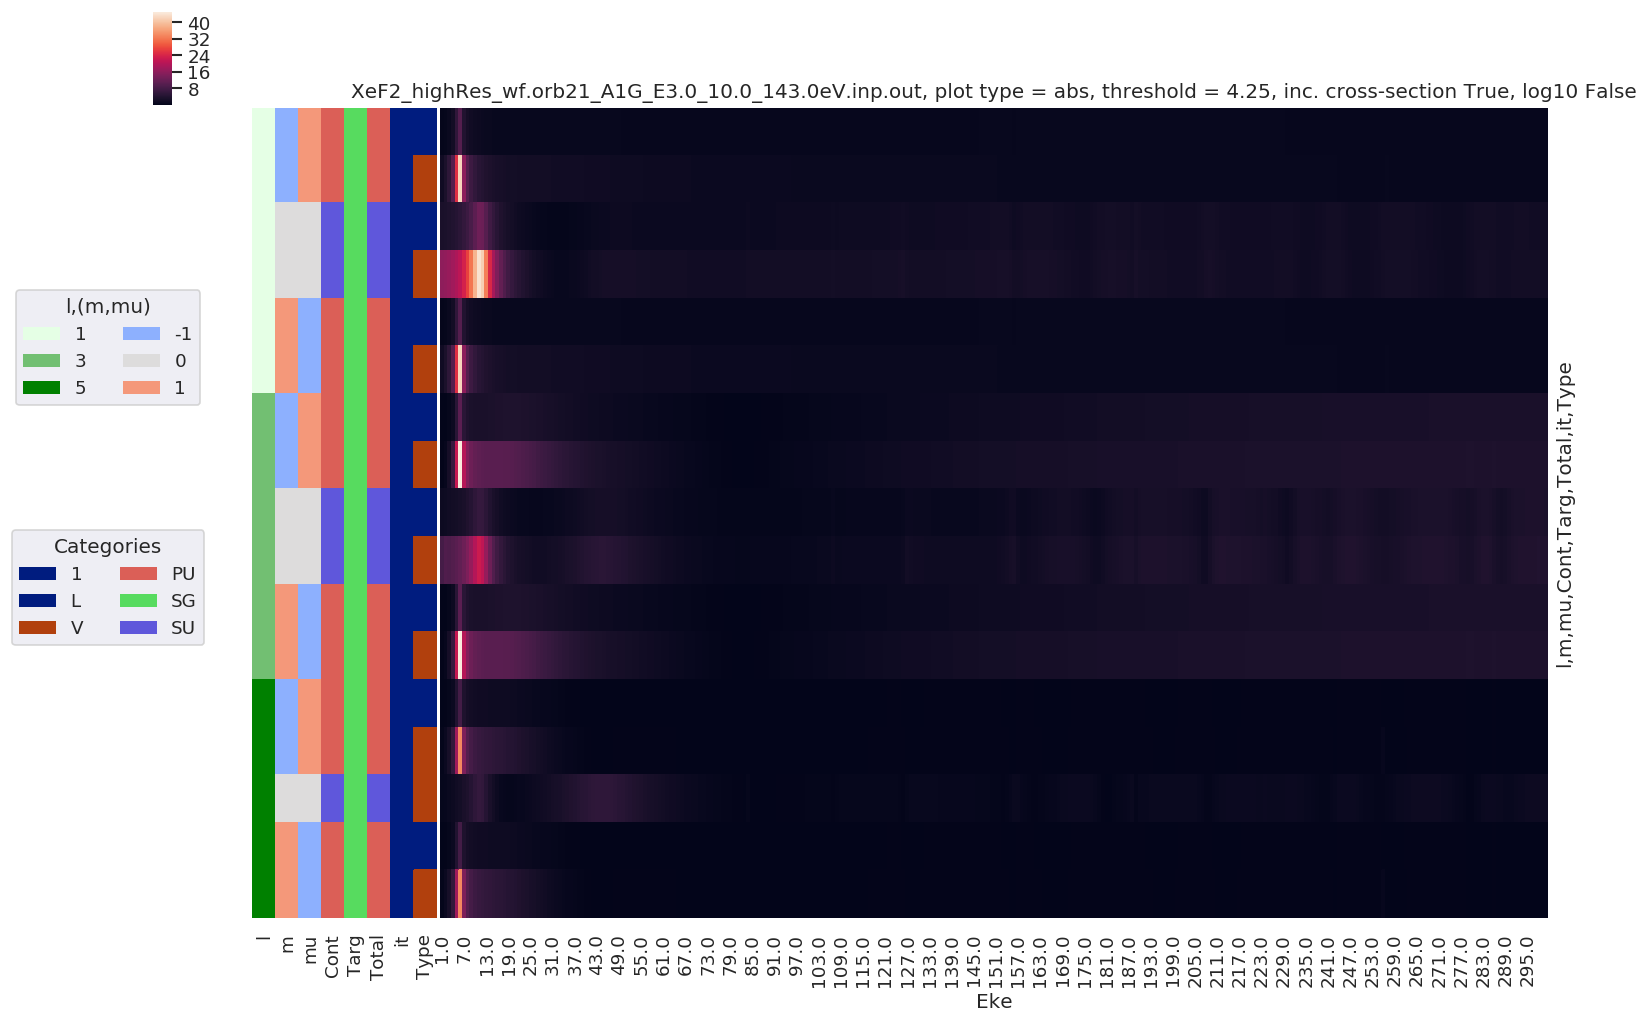

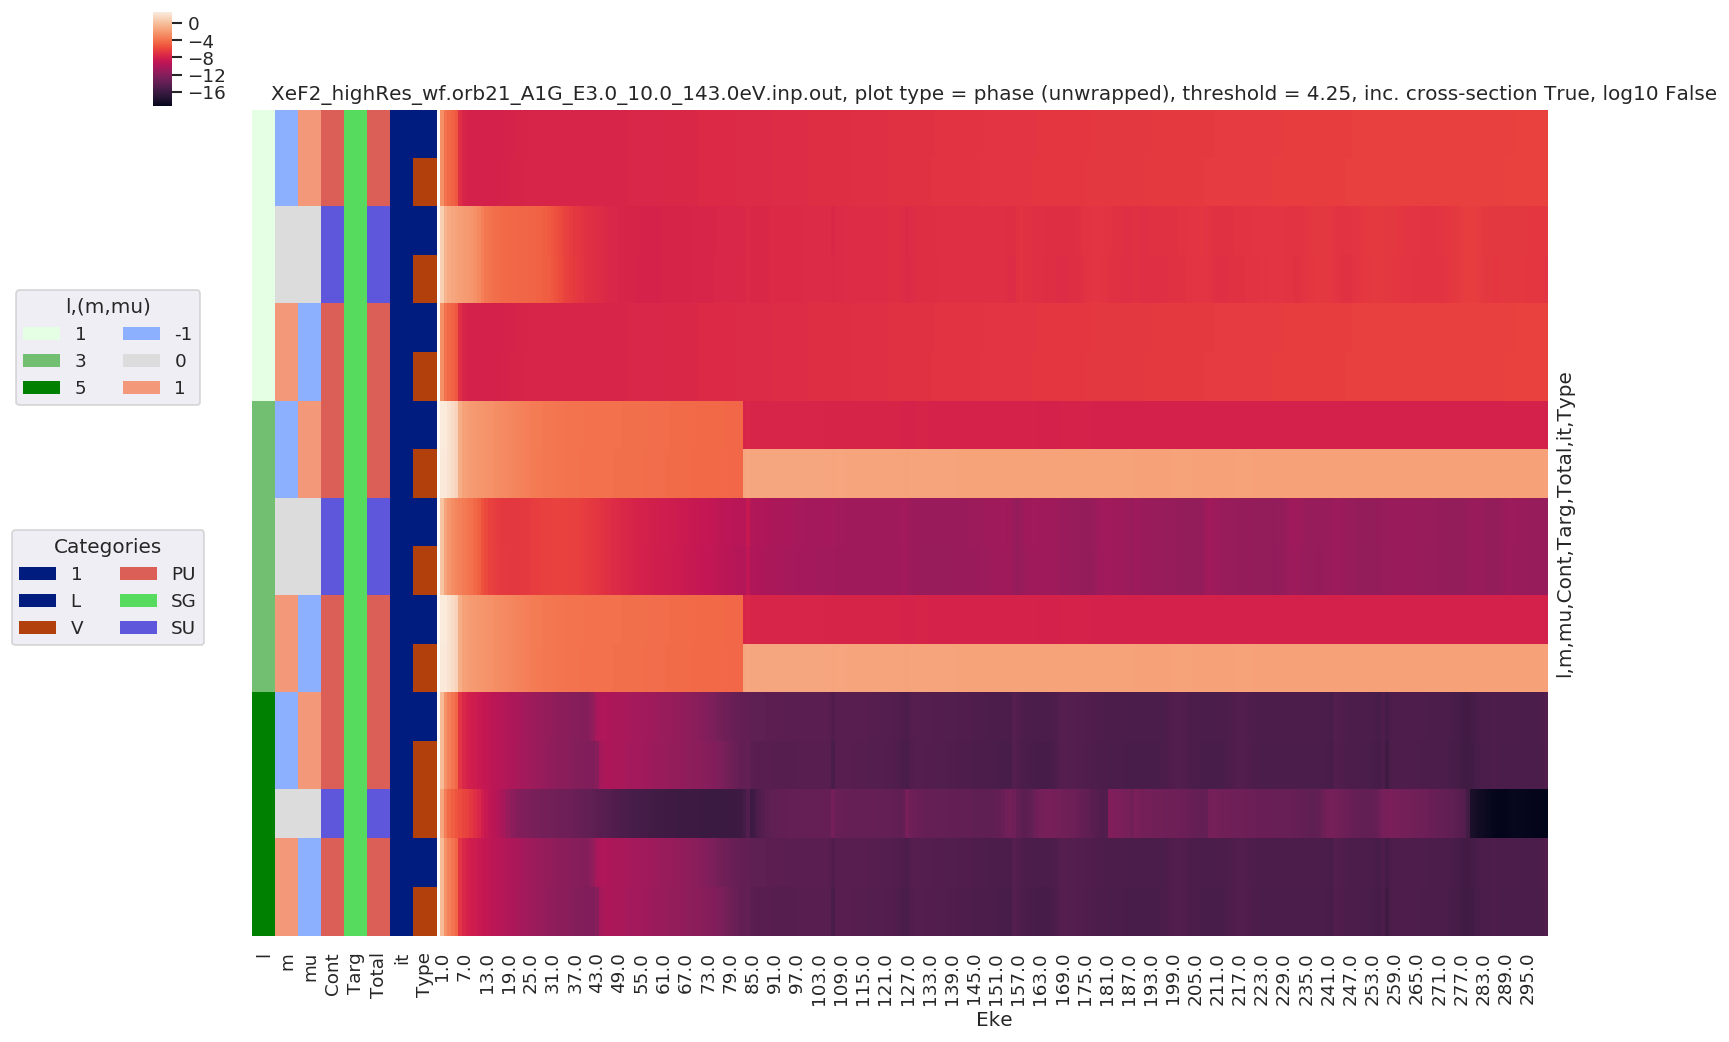

In [10]:
# Plot for each fie
for data in dataMatE:
    # Plot with sensible defaults - all dims with lmPlot()
    
    # Plot only values > theshold
    daPlot, daPlotpd, legendList, gFig = ep.lmPlot(data, thres = thresPlot, thresType = 'pc', figsize = (15,10))

    # Plot phases, with unwrap
    daPlot, daPlotpd, legendList, gFig = ep.lmPlot(data, thres = thresPlot, thresType = 'pc', figsize = (15,10), pType='phaseUW')

## MFPADs

Calculated MF $\beta$ parameters, using ePS dipole matrix elements. These are calculated by `ep.mfblm()`, as a function of energy and polarization geometry. See [the ePSproc docs on `ep.mfblm()`](https://epsproc.readthedocs.io/en/latest/modules/epsproc.MFBLM.html) for further details, and [this demo notebook](https://epsproc.readthedocs.io/en/latest/ePSproc_BLM_calc_demo_Sept2019_rst/ePSproc_BLM_calc_demo_Sept2019.html).

In [11]:
# Set threshold
thresCalc = 1e-3

# Set pol geoms - these correspond to (z,x,y) in molecular frame (relative to principle/symmetry axis)
eAngs = ep.setPolGeoms()

In [12]:
# Calculate for each fie & pol geom
# TODO - file logic, and parallelize
BLM = []
for data in dataMatE:
    BLM.append(ep.mfblmEuler(data, selDims = {'Type':'L'}, eAngs = eAngs, thres = thresCalc, 
                             SFflag = True, verbose = 0))  # Run for all Eke, selected gauge only

In [13]:
# Save BLM data - defaults to working dir and 'ep_timestamp' file
# TODO - testing for array/multiple file case
for data in BLM:
    fileName = dataFile + '_BLM-L_' + timeString.strftime('%Y-%m-%d_%H-%M-%S')
    ep.writeXarray(data, fileName = fileName)

['Written to h5netcdf format', '/home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb21_A1G/XeF2_highRes_wf.orb21_A1G_E10.0_10.0_150.0eV.inp.out_BLM-L_2020-04-01_13-50-25.nc']


/home/paul/anaconda3/envs/ePSproc-v1.2/lib/python3.7/site-packages/xarray/backends/h5netcdf_.py:211: FutureWarning: complex dtypes are supported by h5py, but not part of the NetCDF API. You are writing an HDF5 file that is not a valid NetCDF file! In the future, this will be an error, unless you set invalid_netcdf=True.
  self.ds.attrs[key] = value
/home/paul/anaconda3/envs/ePSproc-v1.2/lib/python3.7/site-packages/xarray/backends/h5netcdf_.py:285: FutureWarning: complex dtypes are supported by h5py, but not part of the NetCDF API. You are writing an HDF5 file that is not a valid NetCDF file! In the future, this will be an error, unless you set invalid_netcdf=True.
  nc4_var.attrs[k] = v


Plotting data XeF2_highRes_wf.orb21_A1G_E3.0_10.0_143.0eV.inp.out, pType=a, thres=0.17383707232179313, with Seaborn


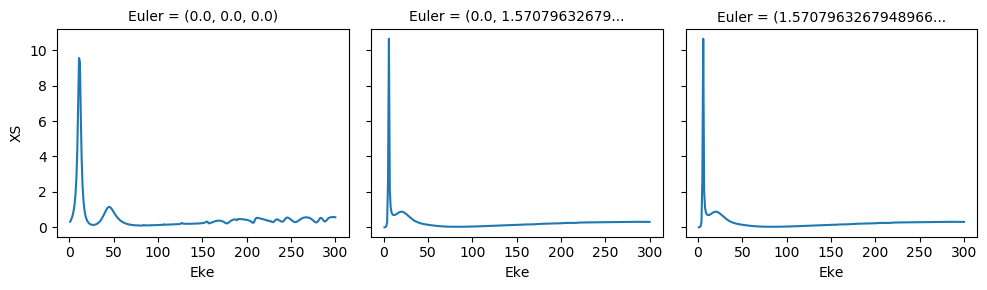

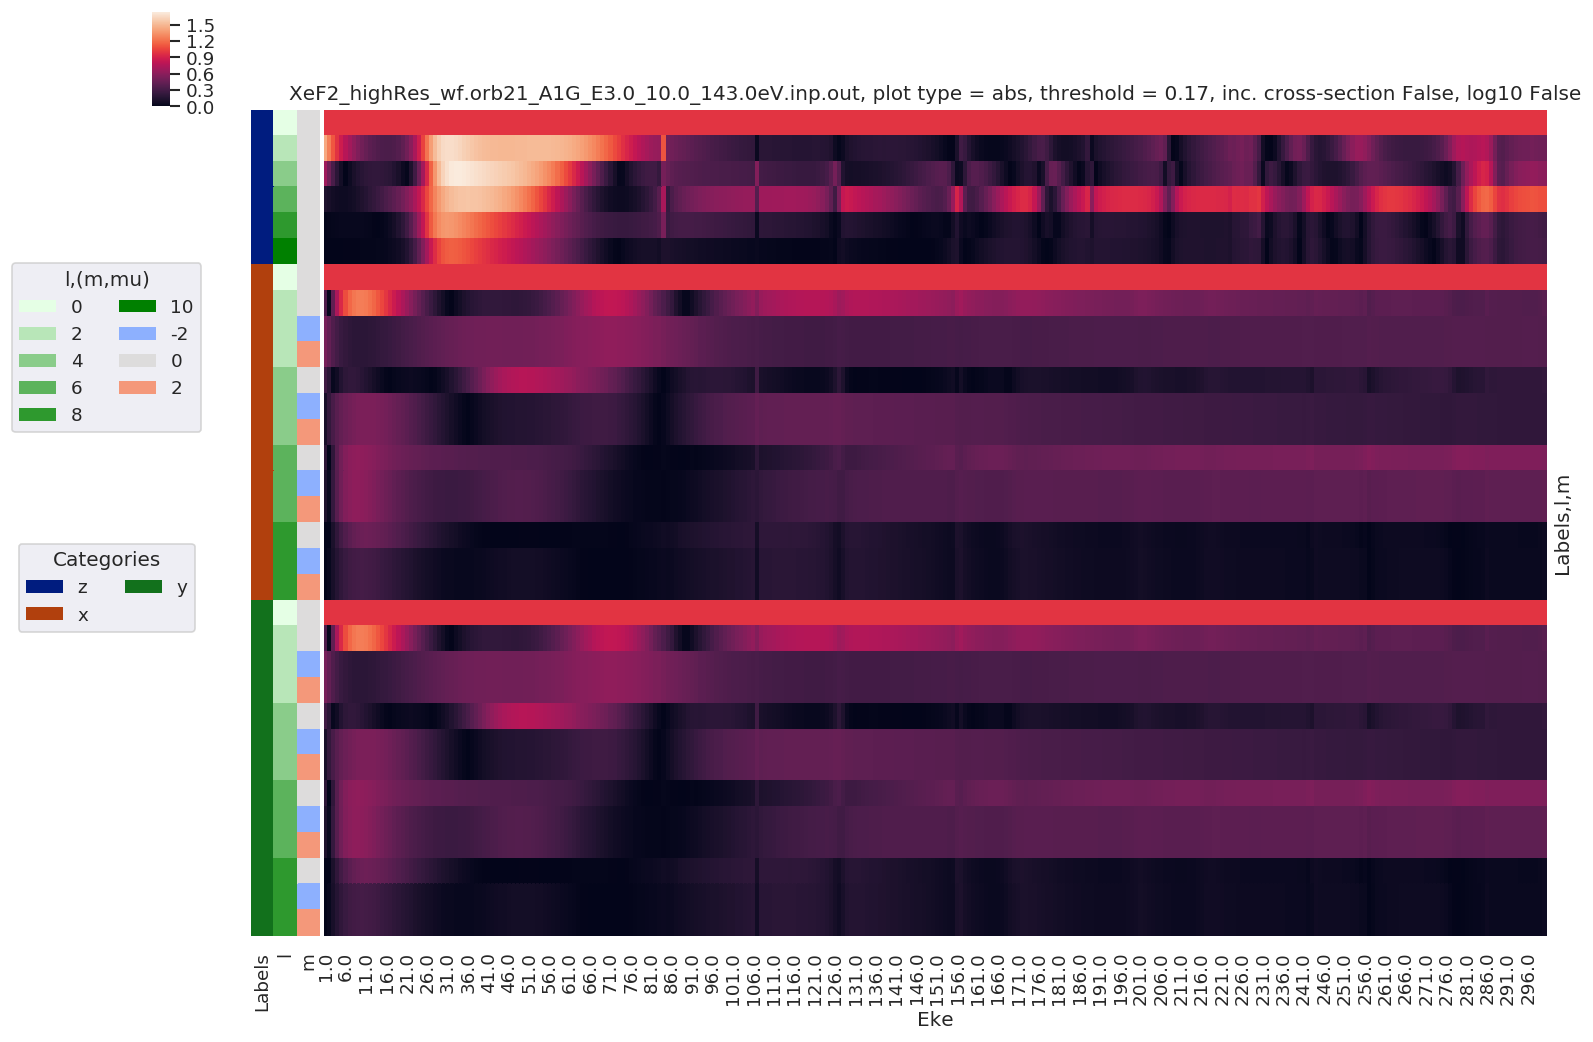

In [14]:
# Normalize and plot results
for BLMplot in BLM:
    # Plot unnormalized B00 only, real part
    # This is/should be in units of MBarn (TBC).
#     BLMplot.where(np.abs(BLMplot) > thres, drop = True).real.squeeze().sel({'l':0, 'm':0}).plot.line(x='Eke', col='Euler');
    BLMplot.XS.real.squeeze().plot.line(x='Eke', col='Euler');

    # Plot values normalised by B00 - now set in calculation function
    # Plot results with lmPlot(), ordering by Euler sets
    # Version with (semi-manual) Euler grouping
    daPlot, daPlotpd, legendList, gFig = ep.lmPlot(BLMplot.swap_dims({'Euler':'Labels'}), SFflag = False, eulerGroup = True,
                                                   thresType = 'pc', thres = thresPlot,
                                                   plotDims = ('Labels','l','m'), 
                                                   figsize = (15,10))

## Error & consistency checks

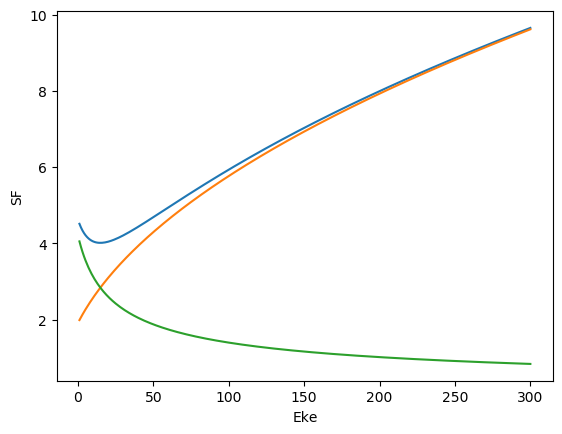

In [15]:
# Check SF values
for data in dataMatE:
    # Plot values, single plot
    data.SF.pipe(np.abs).plot.line(x='Eke')
    data.SF.real.plot.line(x='Eke')
    data.SF.imag.plot.line(x='Eke')
    
    # Plot values, facet plot
#     data.SF.pipe(np.abs).plot.line(x='Eke', col='Sym')


In [16]:
# Compare calculated BLMs for L and V types (dafault above for L)

# Calculate for each fie & pol geom, and compare.
BLMv = []
BLMdiff = []
for n, data in enumerate(dataMatE):
    BLMv.append(ep.mfblmEuler(data, selDims = {'Type':'V'}, eAngs = eAngs, thres = thresCalc, 
                             SFflag = True, verbose = 0))  # Run for all Eke, selected gauge only
    
    BLMdiff.append(BLM[n] - BLMv[n])
    BLMdiff[n]['dXS'] = BLM[n].XS - BLMv[n].XS  # Set XS too, dropped in calc above

    BLMdiff[n].attrs['dataType'] = 'matE'

In [17]:
# Save BLM data - defaults to working dir and 'ep_timestamp' file
# TODO - testing for array/multiple file case
for data in BLMv:
    fileName = dataFile + '_BLM-V_' + timeString.strftime('%Y-%m-%d_%H-%M-%S')
    ep.writeXarray(data, fileName = fileName)

['Written to h5netcdf format', '/home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb21_A1G/XeF2_highRes_wf.orb21_A1G_E10.0_10.0_150.0eV.inp.out_BLM-V_2020-04-01_13-50-25.nc']


/home/paul/anaconda3/envs/ePSproc-v1.2/lib/python3.7/site-packages/xarray/backends/h5netcdf_.py:211: FutureWarning: complex dtypes are supported by h5py, but not part of the NetCDF API. You are writing an HDF5 file that is not a valid NetCDF file! In the future, this will be an error, unless you set invalid_netcdf=True.
  self.ds.attrs[key] = value
/home/paul/anaconda3/envs/ePSproc-v1.2/lib/python3.7/site-packages/xarray/backends/h5netcdf_.py:285: FutureWarning: complex dtypes are supported by h5py, but not part of the NetCDF API. You are writing an HDF5 file that is not a valid NetCDF file! In the future, this will be an error, unless you set invalid_netcdf=True.
  nc4_var.attrs[k] = v


Plotting data XeF2_highRes_wf.orb21_A1G_E3.0_10.0_143.0eV.inp.out, pType=a, thres=0.1706216819520293, with Seaborn


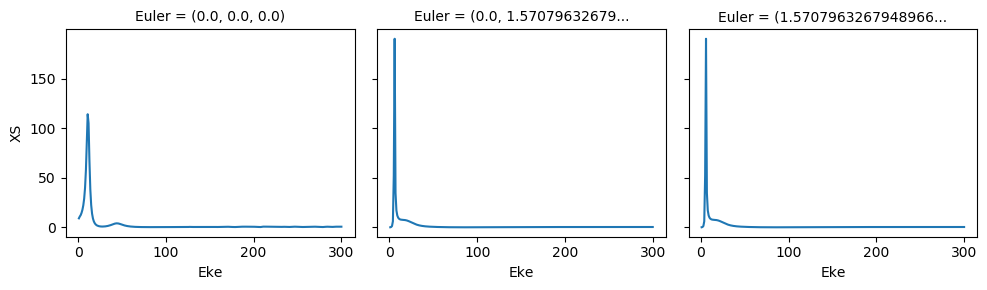

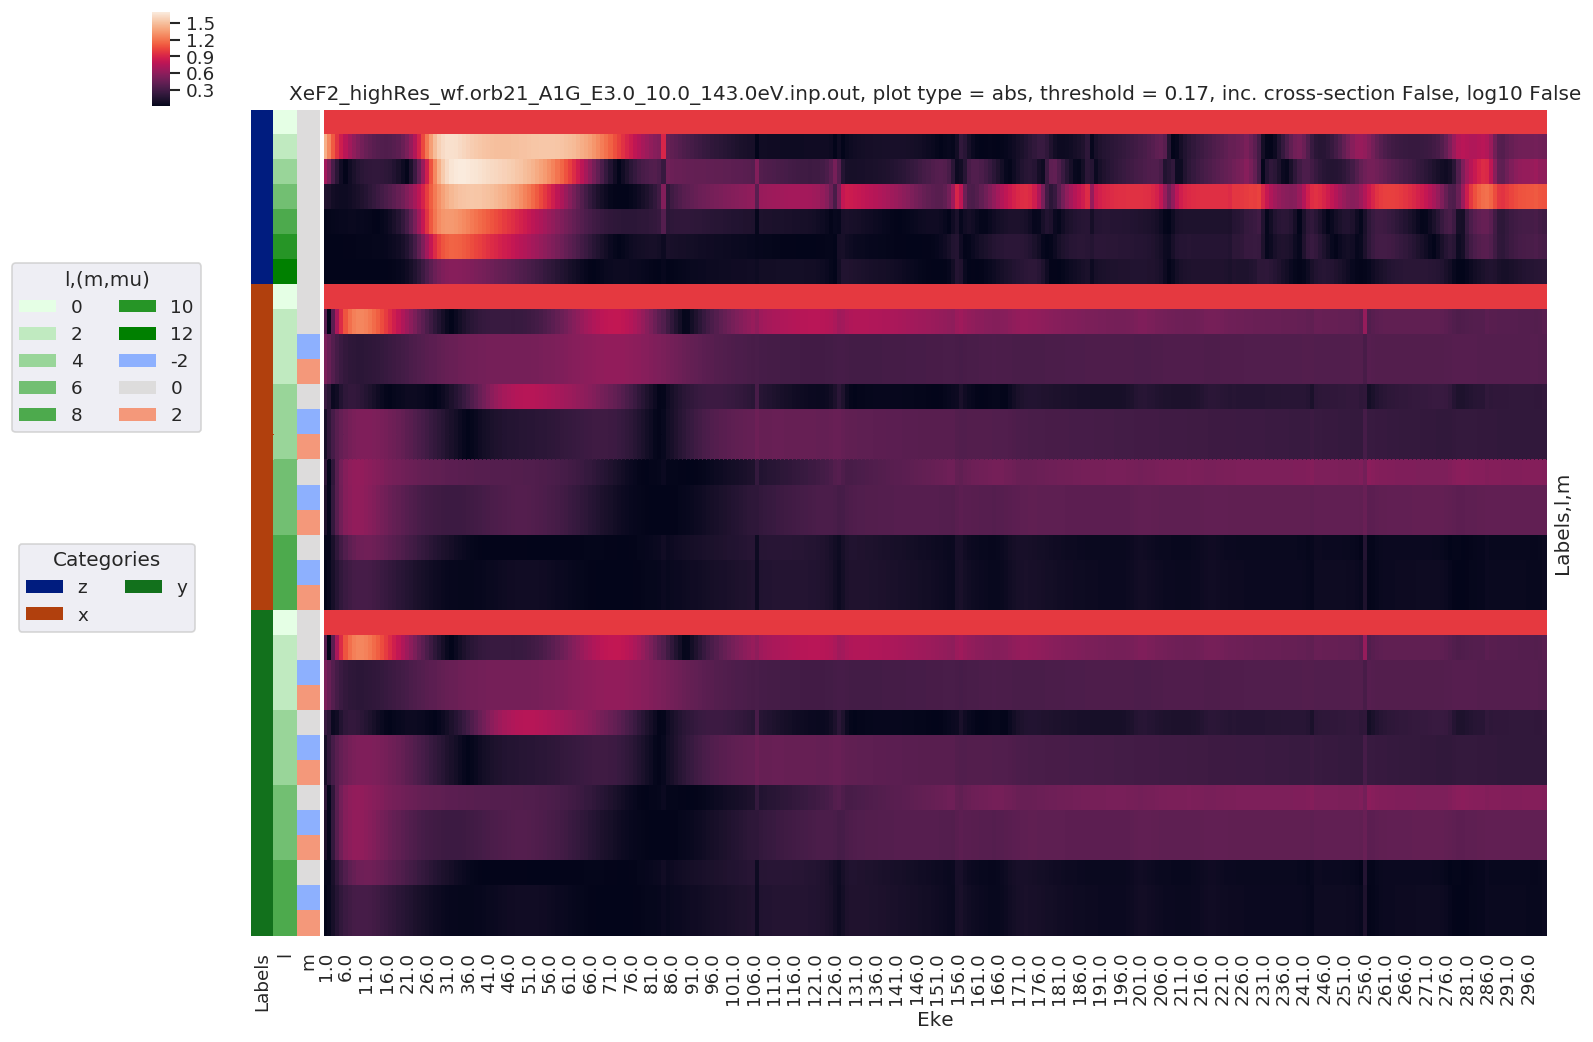

In [18]:
# Normalize and plot results
for BLMplot in BLMv:
    # Plot unnormalized B00 only, real part
    # This is/should be in units of MBarn (TBC).
#     BLMplot.where(np.abs(BLMplot) > thres, drop = True).real.squeeze().sel({'l':0, 'm':0}).plot.line(x='Eke', col='Euler');
    BLMplot.XS.real.squeeze().plot.line(x='Eke', col='Euler');

    # Plot values normalised by B00 - now set in calculation function
    # Plot results with lmPlot(), ordering by Euler sets
    # Version with (semi-manual) Euler grouping
    daPlot, daPlotpd, legendList, gFig = ep.lmPlot(BLMplot.swap_dims({'Euler':'Labels'}), SFflag = False, eulerGroup = True,
                                                   thresType = 'pc', thres = thresPlot,
                                                   plotDims = ('Labels','l','m'), 
                                                   figsize = (15,10))

Differences, L vs. V gauge BLMs
Max difference in BLMs (L-V): 0 (0.270945489675725-5.305859415759765e-18j)
Plotting data (No filename), pType=a, thres=0.027094548967572504, with Seaborn


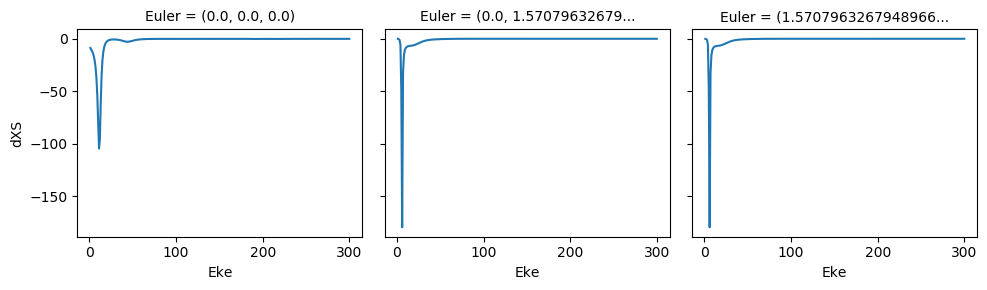

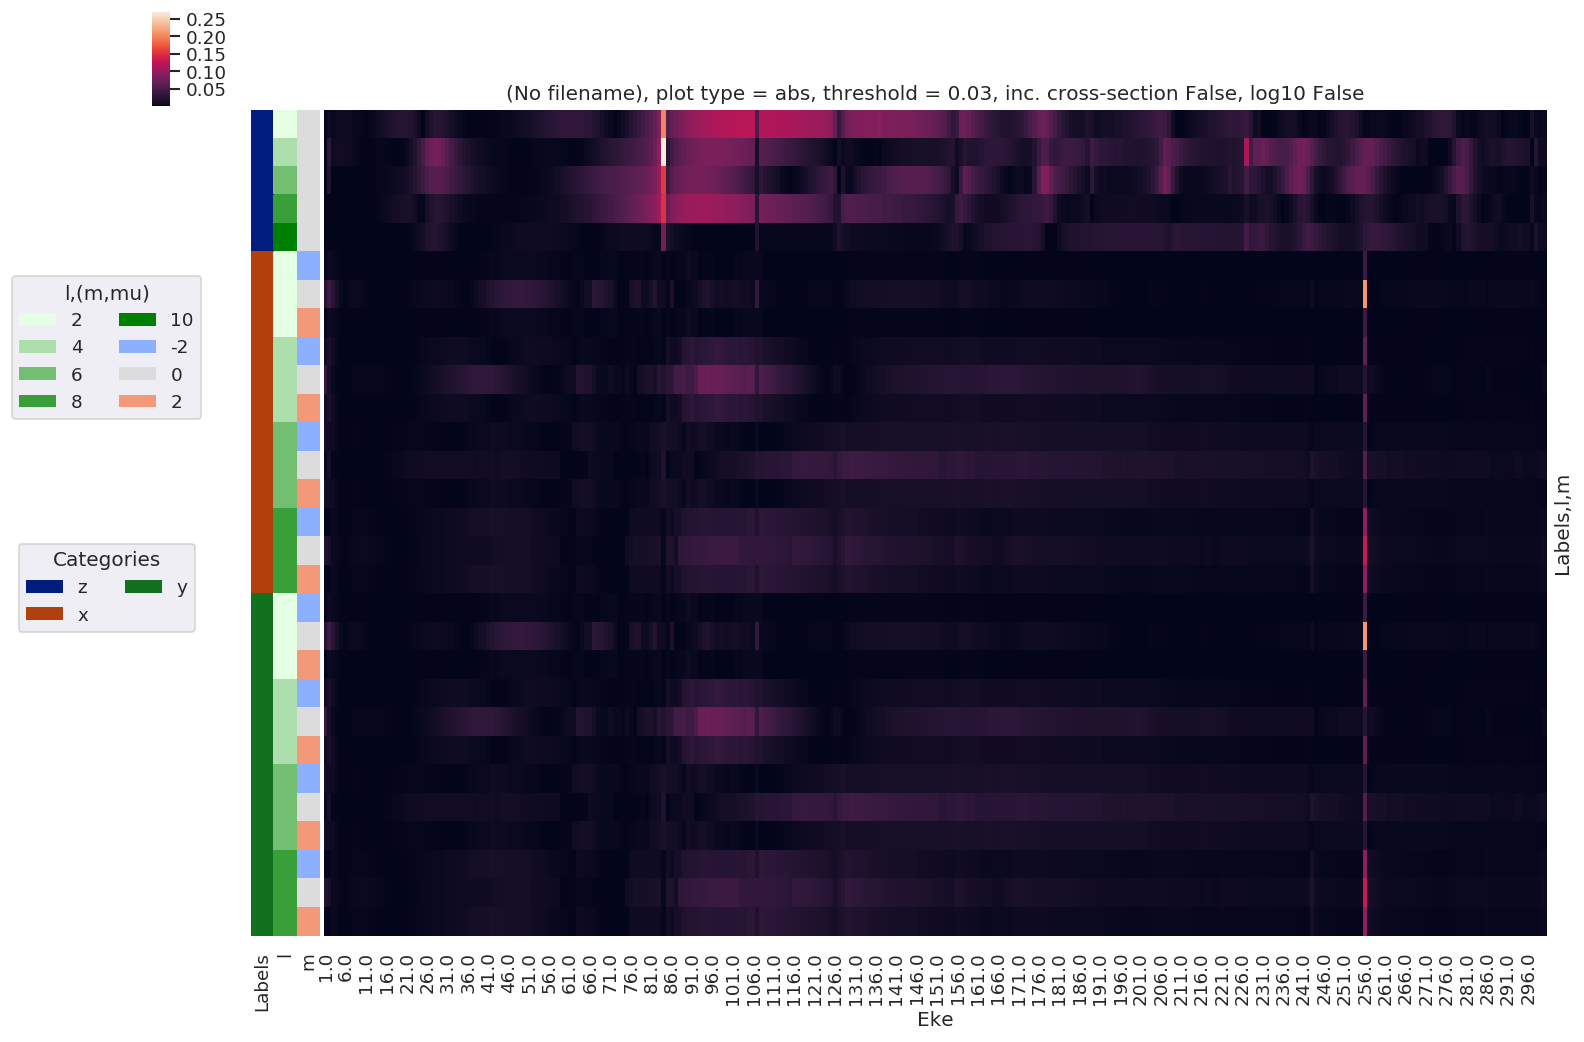

In [19]:
# Difference between 'L' and 'V' results
# NOTE - this currently drops XS

print('Differences, L vs. V gauge BLMs')

for BLMplot in BLMdiff:
    maxDiff = BLMplot.max()
    print(f'Max difference in BLMs (L-V): {0}', maxDiff.data)
    
    if np.abs(maxDiff) > thresCalc:
        # Plot B00 only, real part
#         BLMplot.where(np.abs(BLMplot) > thres, drop = True).real.squeeze().sel({'l':0, 'm':0}).plot.line(x='Eke', col='Euler');
        BLMplot.dXS.real.squeeze().plot.line(x='Eke', col='Euler');

        # Plot values normalised by B00 - now set in calculation function
        # Plot results with lmPlot(), ordering by Euler sets
        # Version with (semi-manual) Euler grouping
        daPlot, daPlotpd, legendList, gFig = ep.lmPlot(BLMplot.swap_dims({'Euler':'Labels'}), SFflag = False, eulerGroup = True,
                                                       thresType = 'pc', thres = thresPlot,
                                                       plotDims = ('Labels','l','m'), 
                                                       figsize = (15,10))


Machine tolerance:  2.220446049250313e-16
Max imaginary value: 0 4.0357162386037453e-16


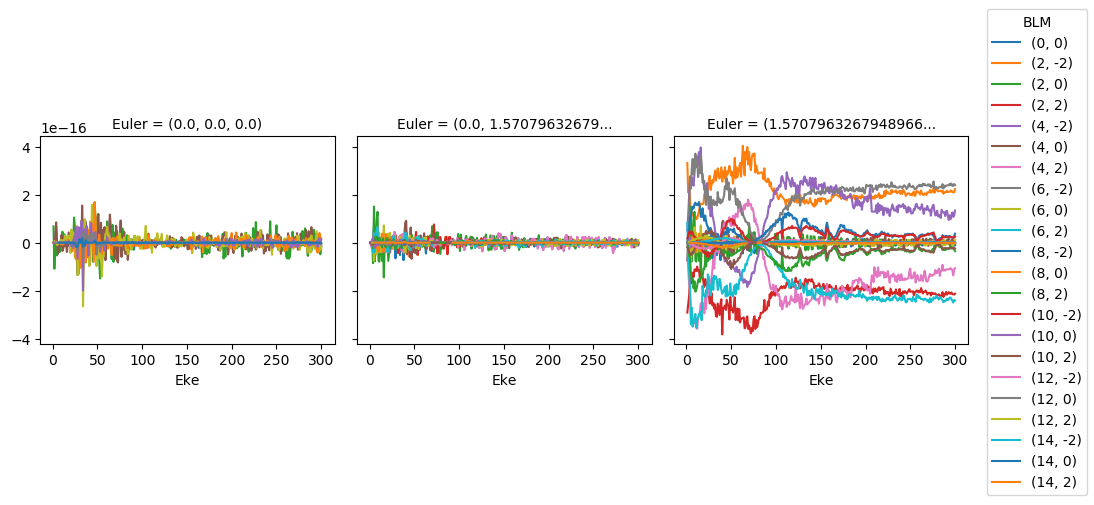

In [20]:
# Check imaginary components - should be around machine tolerance.
print('Machine tolerance: ', np.finfo(float).eps)
for BLMplot in BLM:
    maxImag = BLMplot.imag.max()
    print(f'Max imaginary value: {0}', maxImag.data)
    
#     BLMplot.where(np.abs(BLMplot) > thres, drop = True).imag.squeeze().plot.line(x='Eke', col='Euler');
    
    BLMplot = ep.matEleSelector(BLMplot, thres=thresCalc, dims = 'Eke')
    BLMplot.imag.squeeze().plot.line(x='Eke', col='Euler');

## Version info

### Original job details

In [21]:
print(jobInfo['ePolyScat'][0])
print('Run: ' + jobInfo['Starting'][0].split('at')[1])

ePolyScat Version E3
Run:  2020-03-25  09:35:15.454 (GMT -0400)


### ePSproc details

In [22]:
templateVersion = '0.0.7'
templateDate = '30/03/20'

In [23]:
%load_ext version_information

In [24]:
%version_information epsproc, xarray

Software versions
Python 3.7.6 64bit [GCC 7.3.0]
IPython 7.12.0
OS Linux 4.15.0 66 generic x86_64 with debian stretch sid
epsproc 1.2.5
xarray 0.15.0
Wed Apr 01 14:21:01 2020 EDT

In [25]:
print('Run: {}'.format(timeString.strftime('%Y-%m-%d_%H-%M-%S')))
host = !hostname
print('Host: {}'.format(host[0]))

Run: 2020-04-01_13-50-25
Host: AntonJr
